In [88]:
# This cell just imports relevant modules

import numpy as np
import pylab
from math import pi
from sympy import sin, cos, Function, Symbol, diff, integrate, matrices
%matplotlib inline
import matplotlib.pyplot as plt

# Eigenvalues

## Transformation matrices
Lecture 5, slide 9

Define the transformation matrix in Python using numpy.matrix

In [89]:
mD = np.matrix([[1.25, 0],
                  [0, 0.8]])
           
# A list of coordinate vectors in the form [x,y]. 
# These are stored as numpy arrays so we can easily multiply them 
# by the transformation matrix.
vCoordinates = [np.array([1, 0]),
               np.array([0, 1]),
               np.array([-1, 0]),
               np.array([0, -1])]

# Take each coordinate and transform it
for i in range(0, len(vCoordinates)):
    # We need to reshape the array so it is conformable
    # (i.e. it is of the right dimension for matrix-vector
    # multiplication). In this case, we need it to be 2 x 1.
    vCoordinates[i] = np.reshape(vCoordinates[i], (2,1))
    print(mD*vCoordinates[i]) 
   
sDet = np.linalg.det(mD)
sVolStrain = sDet - 1 # The volumetric strain

print("Determinant of D is: %f" % sDet) 
print("This implies:") 
if(sVolStrain == 1):
    print("No volume change") 
elif(sVolStrain > 1):
    print("Increase in volume") 
elif(sVolStrain > 0 and sVolStrain < 1):
    print("Decrease in volume") 
else:
    print("No geological meaning") 

[[1.25]
 [0.  ]]
[[0. ]
 [0.8]]
[[-1.25]
 [ 0.  ]]
[[ 0. ]
 [-0.8]]
Determinant of D is: 1.000000
This implies:
No geological meaning


## Eigenvalues of a 2 x 2 matrix

Lecture 5, slide 18



In [90]:
mA = np.matrix([[1,4],
                  [1,1]]) 
                  
# A simple way of finding eigenvalues is to use 
# the eigvals function.
sEigValues = np.linalg.eigvals(mA)
print("The eigenvalues of mA are: ", sEigValues) 
             
# Alternatively, we could work out the characteristic polynomial
# for lambda, and then find the roots.
# Computes det(mA - sLambda*mI) and returns a list of scalar coefficients [sX,sY,sZ] for 
# the characteristic polynomial sX*sLambda**2 + sY*sLambda + sZ
sCharacteristicPoly = np.poly(mA)
print("The characteristic polynomial of mA is: (%f*lambda**2) + (%f*lambda) + (%f)" 
      % (sCharacteristicPoly[0], sCharacteristicPoly[1], sCharacteristicPoly[2])) 
# Finds the roots (in this case, these will be the eigenvalues)
sRoots = np.roots(sCharacteristicPoly)
print("The roots of the characteristic polynomial are: ", sRoots) 

The eigenvalues of mA are:  [ 3. -1.]
The characteristic polynomial of mA is: (1.000000*lambda**2) + (-2.000000*lambda) + (-3.000000)
The roots of the characteristic polynomial are:  [ 3. -1.]


## Plotting function

Function to plot the original vectors and unit circle, and transformed vectors and unit circle

In [91]:
def plot_ellipse(a, b, c, d, horizontal_scale, vertical_scale):
    m = np.array([[a, b], [c, d]]) # matrix
    
    (sEigValues, vEigVectors) = np.linalg.eig(m) 
    
    
    # print points on unit circle, coordinates = eigenvectors
    point1 = np.array([vEigVectors[0][0], vEigVectors[1][0]]) 
    point2 = np.array([vEigVectors[0][1], vEigVectors[1][1]])
    
    # transformed points
    transformed_point1 = m @ point1
    print("New vector 1 =", transformed_point1)
    tp1 = sEigValues[0]*point1
    print("Eigenvalue 1 * eigenvector 1\n= %.f" % (sEigValues[0]), "*", point1, "=", tp1, "\n")
    transformed_point2 = m @ point2
    print("New vector 2 =", transformed_point2)
    tp2 = sEigValues[1]*point2
    print("Eigenvalue 2 * eigenvector 2\n= %.f" % (sEigValues[1]), "*", point2, "=", tp2, "\n")
    
    # prove new vector = eigenvalue * eigenvector
    if np.allclose(transformed_point1, tp1) == True and np.allclose(transformed_point1, tp1) == np.allclose(transformed_point2, tp2):
        print("New vector = eigenvalue * eigenvector \n")
    else:
        print("Error \n")
    
    # plot ellipse
    u = 0  # x-position of center
    v = 0  # y-position of center
    a = abs(sEigValues[0])  # radius on x-axis
    b = abs(sEigValues[1])  # radius on y-axis
    t_rot = np.arctan(vEigVectors[1][0]/vEigVectors[0][0]) # rotation angle
    
    t = np.linspace(0, 2*pi, 100)
    
    Ell = np.array([a*np.cos(t), b*np.sin(t)]) # ellipse coordinates
    R_rot = np.array([[cos(t_rot), -sin(t_rot)],[sin(t_rot), cos(t_rot)]]) # 2D rotation matrix
    Ell_rot = np.zeros((2, Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = R_rot @ Ell[:,i] # rotated ellipse coordinates
        
    ang = np.allclose(point1@point2, 0)
    if ang == True:
        print("The matrix is symmetrical, so the two eigenvectors are perpendicular")
    else:
        print("The matrix is NOT symmetrical, so the two eigenvectors are NOT perpendicular")
        
    plt.figure(figsize=(horizontal_scale,vertical_scale))
    plt.plot([0, point1[0]], [0, point1[1]], 'r', label='eigenvector 1 = [{:.2f}, {:.2f}]'.format(vEigVectors[0][0],vEigVectors[1][0]), linewidth=5)
    plt.plot([0, point2[0]], [0, point2[1]], 'c', label='eigenvector 2 = [{:.2f}, {:.2f}]'.format(vEigVectors[0][1],vEigVectors[1][1]), linewidth=5)
    plt.plot(np.cos(t), np.sin(t), 'k', label='unit circle')
    # new vector = eigenvalue * eigenvector
    plt.plot([0, tp1[0]], [0, tp1[1]], 'k--', label='eigenvalue 1 = {:.0f}'.format(sEigValues[0]))
    plt.plot([0, tp2[0]], [0, tp2[1]], 'b--', label='eigenvalue 2 = {:.0f}'.format(sEigValues[1]))
    plt.plot(u+Ell_rot[0,:], v+Ell_rot[1,:], 'g', label='transformed unit circle')
    plt.legend(loc='upper left', fontsize=10)
    plt.title('The meaning of eigenvectors and eigenvalues illustrated on a unit circle', fontsize=14)
    plt.grid(True)
    plt.show()

## Eigenvectors of a 2 x 2 matrix

Lecture 5, slide 20

In [92]:
mA = np.matrix([[1,4],
                  [1,1]]) 
                  
# A simple way of finding eigenvectors is to use 
# the eig function. Note that this gives BOTH the eigenvalues in an array (say 'sEigValues')
# AND eigenvectors in a matrix data type (say 'vEigVectors'). 
#The i-th eigenvector, stored in the column vEigVectors[:,i], 
# corresponds to the eigenvalue stored in sEigValues[i].
(sEigValues, vEigVectors) = np.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

Eigenvalue # 1  is:  3.0000000000000004
The corresponding eigenvector is:
 [[0.89442719]
 [0.4472136 ]]
Eigenvalue # 2  is:  -0.9999999999999996
The corresponding eigenvector is:
 [[-0.89442719]
 [ 0.4472136 ]]


New vector 1 = [2.68328157 1.34164079]
Eigenvalue 1 * eigenvector 1
= 3 * [0.89442719 0.4472136 ] = [2.68328157 1.34164079] 

New vector 2 = [ 0.89442719 -0.4472136 ]
Eigenvalue 2 * eigenvector 2
= -1 * [-0.89442719  0.4472136 ] = [ 0.89442719 -0.4472136 ] 

New vector = eigenvalue * eigenvector 

The matrix is NOT symmetrical, so the two eigenvectors are NOT perpendicular


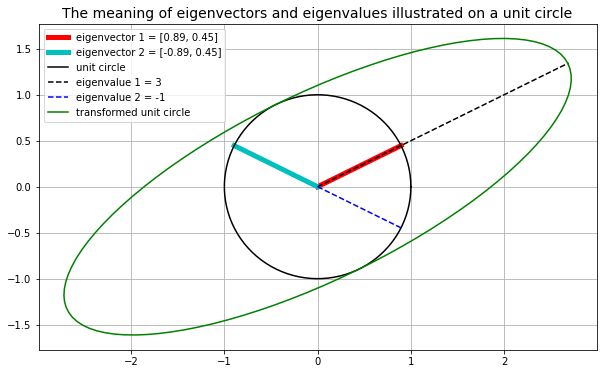

In [93]:
# plot
plot_ellipse(1,4,1,1,10,6)

## Repeated eigenvalues

Lecture 5, slide 24

In [94]:
mA = np.matrix([[1,0],
                  [0,1]]) 
#NOTE: Here we could also define mA using numpy.identity(2).

#NOTE: NumPy will give ALL eigenvalues, including the repeated ones.
(sEigValues, vEigVectors) = np.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

Eigenvalue # 1  is:  1.0
The corresponding eigenvector is:
 [[1.]
 [0.]]
Eigenvalue # 2  is:  1.0
The corresponding eigenvector is:
 [[0.]
 [1.]]


New vector 1 = [1. 0.]
Eigenvalue 1 * eigenvector 1
= 1 * [1. 0.] = [1. 0.] 

New vector 2 = [0. 1.]
Eigenvalue 2 * eigenvector 2
= 1 * [0. 1.] = [0. 1.] 

New vector = eigenvalue * eigenvector 

The matrix is symmetrical, so the two eigenvectors are perpendicular


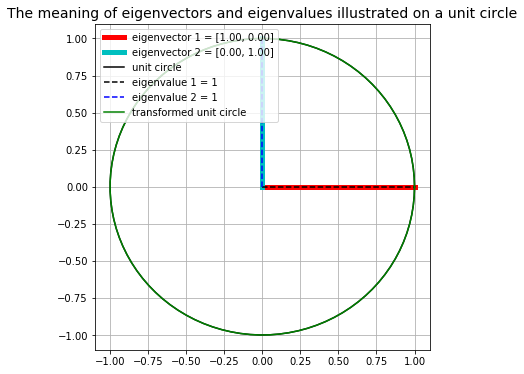

In [95]:
# plot
plot_ellipse(1, 0, 0, 1, 6, 6)

## Real and complex eigenvalues

Lecture 5, slide 28

In [96]:
mA = np.matrix([[0,1],
                  [-1,0]]) 
# NumPy prints out complex numbers in the form c = a + bj, where j is the imaginary number.
# We can use numpy.real(c) and numpy.imag(c) to print the real and imaginary parts respectively.
sEigValues = np.linalg.eigvals(mA) 
print("The eigenvalues of A are: ", sEigValues) 
print("The real part of the first eigenvalue is: %f" % np.real(sEigValues[0])) 
print("The imaginary part of the first eigenvalue is: %f" % np.imag(sEigValues[0])) 

The eigenvalues of A are:  [0.+1.j 0.-1.j]
The real part of the first eigenvalue is: 0.000000
The imaginary part of the first eigenvalue is: 1.000000


## Example eigenvalue problem

Lecture 5, slide 30

In [97]:
mM = np.matrix([[3,-1],
                  [-1,3]])
(sEigValues, vEigVectors) = np.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

Eigenvalue # 1  is:  1j
The corresponding eigenvector is:
 [[0.70710678+0.j        ]
 [0.        +0.70710678j]]
Eigenvalue # 2  is:  -1j
The corresponding eigenvector is:
 [[0.70710678-0.j        ]
 [0.        -0.70710678j]]


New vector 1 = [ 2.82842712 -2.82842712]
Eigenvalue 1 * eigenvector 1
= 4 * [ 0.70710678 -0.70710678] = [ 2.82842712 -2.82842712] 

New vector 2 = [1.41421356 1.41421356]
Eigenvalue 2 * eigenvector 2
= 2 * [0.70710678 0.70710678] = [1.41421356 1.41421356] 

New vector = eigenvalue * eigenvector 

The matrix is symmetrical, so the two eigenvectors are perpendicular


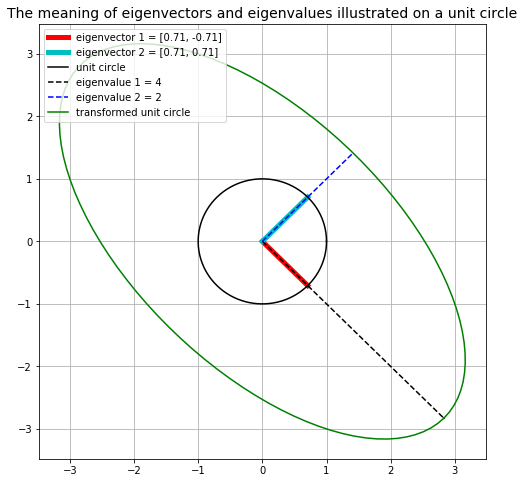

In [98]:
# plot
plot_ellipse(3, -1, -1, 3, 8, 8)

## Symmetric matrices

Lecture 5, slide 31

In [99]:
mNonSymmetric = np.matrix([[1,4],
                              [1,1]])
                              
(sEigValues, vEigVectors) = np.linalg.eig(mNonSymmetric)

```{note}
NOTE 1: Unfortunately, because referencing a column of the matrix vEigVectors also returns another matrix data type (essentially a 'sub-matrix' of vEigVectors), we cannot use the numpy.dot function (which only operates on vectors/1D arrays). Instead, we'll simply use numpy.transpose to perform the dot product instead.

NOTE 2: could also use numpy.vdot - read the documentation for more info.
```

In [100]:
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

print("The dot product of the two eigenvectors is: ", float(np.transpose(vEigVectors[:,0])*vEigVectors[:,1])) 

mSymmetric = np.matrix([[3,-1],
                           [-1,3]])
                              
(sEigValues, vEigVectors) = np.linalg.eig(mSymmetric)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 
# The dot product should be zero here, as the two eigenvectors are orthogonal
# for any symmetric matrix. 
print("The dot product of the two eigenvectors is: ", float(np.transpose(vEigVectors[:,0])*vEigVectors[:,1])) 

Eigenvalue # 1  is:  3.0000000000000004
The corresponding eigenvector is:
 [[0.89442719]
 [0.4472136 ]]
Eigenvalue # 2  is:  -0.9999999999999996
The corresponding eigenvector is:
 [[-0.89442719]
 [ 0.4472136 ]]
The dot product of the two eigenvectors is:  -0.6000000000000001
Eigenvalue # 1  is:  4.0
The corresponding eigenvector is:
 [[ 0.70710678]
 [-0.70710678]]
Eigenvalue # 2  is:  2.0
The corresponding eigenvector is:
 [[0.70710678]
 [0.70710678]]
The dot product of the two eigenvectors is:  0.0


## Eigenvalue problem for a 3 x 3 matrix

Lecture 5, slide 37

In [101]:
mM = np.matrix([[2,2,1],
                   [1,3,1],
                   [1,2,2]])
(sEigValues, vEigVectors) = np.linalg.eig(mM)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

Eigenvalue # 1  is:  1.0
The corresponding eigenvector is:
 [[-0.90453403]
 [ 0.30151134]
 [ 0.30151134]]
Eigenvalue # 2  is:  4.999999999999998
The corresponding eigenvector is:
 [[0.57735027]
 [0.57735027]
 [0.57735027]]
Eigenvalue # 3  is:  0.9999999999999997
The corresponding eigenvector is:
 [[ 0.04093652]
 [-0.46313831]
 [ 0.88534011]]


```{note}
If the values of x1, x2 or x3 are 'free' (i.e. can be chosen arbitrarily to obtain an independent eigenvector), NumPy does not necessarily choose values of 0 or 1, which is why the eigenvectors printed out here are different from those in your notes. They still satisfy the equation (A - lambda*I)x = 0 and are still independent eigenvectors.
```